In [2]:
import parser 
import pandas as pd
import itertools
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from voting_rules import voting_rules as vr
import rcv_dimensionality

In [96]:
def plot_voters_sam(ballots, candidates, positions):
    
    x = []
    for candidate in positions:
        x.append(positions[candidate])
    x.sort()
    X = np.array(x)
    X.sort()
    values = {}
    bullet = {}

    for ballot in ballots:
        if len(ballot) > 0:
            if len(ballot) == 1:
                candidate = ballot[0]
                if positions[candidate] not in bullet:
                    bullet[positions[candidate]] = 0
                bullet[positions[candidate]] += ballots[ballot]
            
            else:
                candidate = ballot[0] 
                if positions[candidate] not in values:
                    values[positions[candidate]] = 0
                
                values[positions[candidate]] += ballots[ballot]
    

    Y = []
    for candidate in X:
        Y.append(values[candidate])
    
    widths = []
    widths.append(X[1] - X[0])
    for i in range(1, len(X) - 1):
        d = (X[i] - X[i - 1]) / 2
        d += (X[i + 1] - X[i]) / 2
        widths.append(d)
    widths.append((X[len(X) - 1] - X[len(X) - 2]))
    w = np.array(widths)
    print(X)
    print(Y)
    print(w)

    starts = []
    starts.append(X[0] - (widths[0]/2))
    starts.append(X[0] + (widths[0]/2))
    for i in range(1, len(X)):
        starts.append(widths[i] + starts[i])
    print(starts)
    s = []
    for i in range(len(starts) - 1):
        s.append((starts[i] + starts[i + 1]) / 2)
    s = np.array(s)
    print(s)
    plt.bar(s, Y, width=w)
    plt.xticks(X, Y, rotation=45, ha='right')
    
    b_points = []
    for x in X:
        if x in bullet:
            b_points.append(bullet[x])
    plt.scatter(X, b_points)
    plt.grid(True)
    plt.show()



In [42]:
file1 = "dataverse_files/Alaska_08162022_HouseofRepresentativesSpecial.csv"

ballots1, candidates1 = parser.parser(file1)
positions1 = rcv_dimensionality.perform_rcv_and_normalize(file1)



/Users/Mahshad/Documents/GitHub/bugs-in-democracy/team_arrow/cvr_class/rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in divide
  distance = 1 / np.sqrt(freq_upper_triangle)


{'Palin, Sarah': 0.0, 'Begich, Nick': 0.8299128528030508, 'Peltola, Mary S.': 2.0}
dict_values([0.0, 0.8299128528030508, 2.0])
[0.         0.82991285 2.        ]
[37874, 42705, 52218]
[0.82991285 1.         1.17008715]
[-0.4149564264015254, 0.4149564264015254, 1.4149564264015253, 2.5850435735984743]
[0.         0.91495643 2.        ]


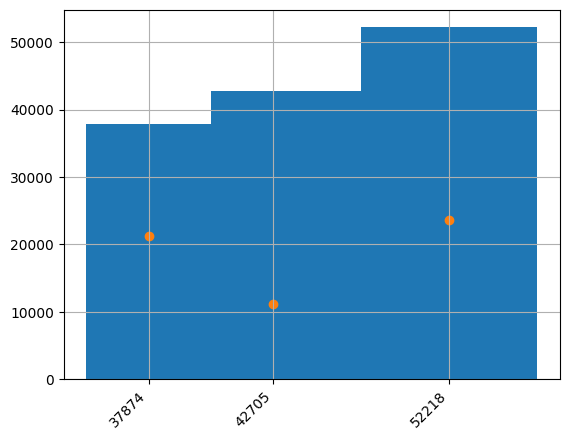

In [92]:
print(positions1)
print(positions1.values())

plot_voters_sam(ballots1, candidates1, positions1)

In [40]:
file = "dataverse_files/Maine_11062018_CongressionalDistrict2.csv"

ballots, candidates = parser.parser(file)
positions = rcv_dimensionality.perform_rcv_and_normalize(file)

/Users/Mahshad/Documents/GitHub/bugs-in-democracy/team_arrow/cvr_class/rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in divide
  distance = 1 / np.sqrt(freq_upper_triangle)


{'REP Poliquin, Bruce': 0.0, 'Hoar, William R.S.': 1.266879348134966, 'Bond, Tiffany L.': 2.054072888510338, 'DEM Golden, Jared F.': 3.0}
dict_values([0.0, 1.266879348134966, 2.054072888510338, 3.0])
[0.         1.26687935 2.05407289 3.        ]
[44689, 4816, 12249, 80472]
[1.26687935 1.02703644 0.86656033 0.94592711]
[-0.633439674067483, 0.633439674067483, 1.660476118322652, 2.527036444255169, 3.472963555744831]
[0.         1.1469579  2.09375628 3.        ]


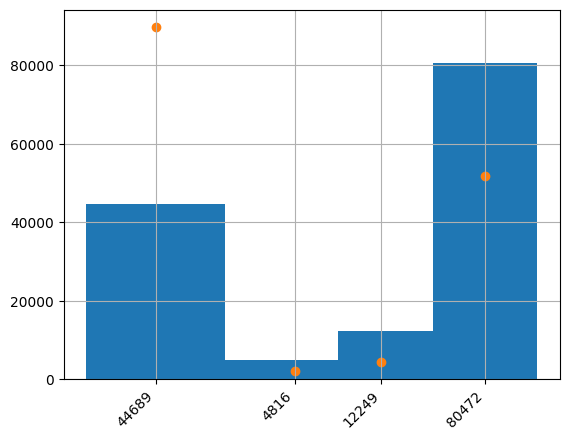

In [97]:
print(positions)
print(positions.values())

plot_voters_sam(ballots, candidates, positions)

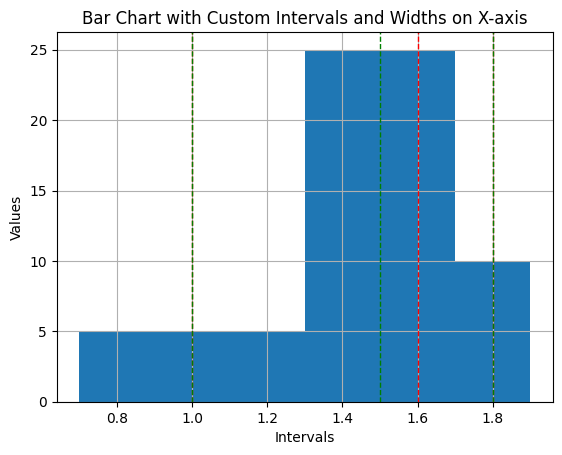

In [77]:
intervals = [1, 1.6, 1.8]
values = [5, 25, 10]

# Custom interval positions and widths
interval_positions = [1, 1.5, 1.8]
interval_widths = [0.6, 0.4, 0.2]

# Plot the bar chart with custom positions and widths
plt.bar(interval_positions, values, width=interval_widths)

# Customize the x-axis tick labels
#plt.xticks([0.25, 1.4, 2.7], intervals)

for pos in intervals:
    plt.axvline(pos, color='red', linestyle='--', linewidth=1)


for pos in interval_positions:
    plt.axvline(pos, color='green', linestyle='--', linewidth=1)
# Customize the plot
plt.xlabel('Intervals')
plt.ylabel('Values')
plt.title('Bar Chart with Custom Intervals and Widths on X-axis')
plt.grid(True)

# Show the plot
plt.show()

In [22]:
def freq(ballots, candidates):
    result_freq = {}
    result_first = {}

    frequency = {}
    first = {}
    empty = 0
    for c in candidates:
        frequency[c] = 0
        first[c] = 0
    
    for b in ballots:
        if len(b) > 0:
            first[b[0]] += ballots[b]
        else:
            empty += ballots[b]
        for c in b:
            frequency[c] += ballots[b]
    
    total = sum(ballots.values())
    total -= empty 
    for c in sorted(frequency):
        result_freq[c] = (frequency[c]/total) * 100
    for c in sorted(first):
        result_first[c] = (first[c]/total) * 100
    
   
    return result_freq, result_first




In [23]:
file = "dataverse_files/NewYorkCity_06222021_DEMCouncilMember7thCouncilDistrict.csv"
ballots, candidates = parser.parser(file)

print(freq(ballots, candidates)[0])

print(freq(ballots, candidates)[1])


{'Luis Tejada': 5747, 'Carmen R. Quinones': 3785, 'Stacy R. Lynch': 8107, 'Keith L. Harris': 3820, 'Maria Ordonez': 9085, 'Daniel M. Cohen': 7828, 'Raymond Sanchez Jr.': 3224, 'Miguel Estrella': 2762, 'Corey Ortega': 5631, 'Shaun Abreu': 12323, 'Lena Melendez': 3120, 'Marti Gould  Allen-Cummings': 7197}
{'Luis Tejada': 2155, 'Carmen R. Quinones': 748, 'Stacy R. Lynch': 2409, 'Keith L. Harris': 1151, 'Maria Ordonez': 2614, 'Daniel M. Cohen': 2587, 'Raymond Sanchez Jr.': 497, 'Miguel Estrella': 789, 'Corey Ortega': 961, 'Shaun Abreu': 6229, 'Lena Melendez': 396, 'Marti Gould  Allen-Cummings': 2678}
{'Carmen R. Quinones': 16.304816059274575, 'Corey Ortega': 24.256913931248384, 'Daniel M. Cohen': 33.721030412682005, 'Keith L. Harris': 16.455587145687947, 'Lena Melendez': 13.440165417420522, 'Luis Tejada': 24.756612389075556, 'Maria Ordonez': 39.13586628758508, 'Marti Gould  Allen-Cummings': 31.002843111915222, 'Miguel Estrella': 11.897992590678038, 'Raymond Sanchez Jr.': 13.88817093133453